## Importações

In [2]:
import os
import sys

notebook_dir = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(notebook_dir, '..'))

from package.bd_classes import *
from package.my_style_classes import *
from package.supply_format import truncate_label
import pandas as pd
import copy

## Indicadores

Os dados da ANAC oferecem uma visão abrangente do cenário do transporte aéreo brasileiro, revelando a intensidade e diversidade do setor. Esses indicadores, que englobam natureza dos voos, passageiros, transporte de carga e eficiência operacional, são fundamentais para compreender a complexidade e vitalidade dessa importante faceta da infraestrutura nacional.

A seguir, será abordado alguns indicadores iniciais dessa base de dados com a finalidade de fazer uma análise exploratória nessa primeira impressão:

#### Decolagens

O Banco de Dados revela um impressionante número de 10 milhões de decolagens. Esse volume expressivo destaca a intensidade da atividade aérea no Brasil no período da última decada

In [3]:
decolagens_totais = Basic_aggregate(table='voo',col_aggregate="DECOLAGENS").run_sum()[0][0]

print(f'As decolagens totais do Banco de dados são de: {format_ticks(decolagens_totais)}')

As decolagens totais do Banco de dados são de: 10MM


#### Natureza dos Voos

A análise da natureza dos voos revela uma predominância nacional, com 299 mil registros de voos domésticos, enquanto os voos internacionais totalizam 103 mil registros. Essa distribuição evidência a significativa participação do transporte aéreo no cenário interno.

In [4]:
contagem_natureza = Basic_aggregate(table='voo',col_aggregate="*",cols_group=['NATUREZA']).run_count()

print(f'A Natureza dos voos foram de: {contagem_natureza[0][0]} - {format_ticks(contagem_natureza[0][1])} '
      f'e {contagem_natureza[1][0]} - {format_ticks(contagem_natureza[1][1])} em registros')

A Natureza dos voos foram de: DOMÉSTICA - 299mil e INTERNACIONAL - 103mil em registros


#### Passageiros Transportados

Com um total de 1 bilhão de passageiros, sendo 1 bilhão pagos e 21 milhões gratuitos, fica evidente o tipo de passageiro majoritário, contudo, ainda é expressivo a quantidade de passageiros gratuitos, visto que em média anual, esse valor é acima dos 2 milhões, sendo aqueles que se beneficiam de promoções, descontos ou programas especiais.

In [5]:
passageiros_totais = Basic_aggregate(table='voo', col_aggregate='PASSAGEIROS_PAGOS + PASSAGEIROS_GRATIS').run_sum()[0][0]
passageiros_pagos = Basic_aggregate(table='voo', col_aggregate='PASSAGEIROS_PAGOS').run_sum()[0][0]
passageiros_gratis = Basic_aggregate(table='voo', col_aggregate='PASSAGEIROS_GRATIS').run_sum()[0][0]

print(f'Tivemos {format_ticks(passageiros_totais)} passageiros totais, sendo eles {format_ticks(passageiros_pagos)} '
      f'pagos e {format_ticks(passageiros_gratis)} gratis')

Tivemos 1B passageiros totais, sendo eles 1B pagos e 21MM gratis


#### Carga Transportada

Com a movimentação expressiva de 12 bilhões de quilogramas, isso representa que na última década, foram transportada 12 milhões de toneladas, por se tratar de carga área, isso demonstra o grande poder logístico que o Brasil tem neste tipo de transporte 

In [6]:
carga_total = Basic_aggregate(table='voo', col_aggregate='CARGA_PAGA_KG + CARGA_GRATIS_KG').run_sum()[0][0]
carga_paga = Basic_aggregate(table='voo', col_aggregate='CARGA_PAGA_KG').run_sum()[0][0]
carga_gratis = Basic_aggregate(table='voo', col_aggregate='CARGA_GRATIS_KG').run_sum()[0][0]

print(f'No total, foram transportados {format_ticks(int(carga_total))} kgs,'
      f'sendo {format_ticks(int(carga_paga))} de kgs pagos e {format_ticks(int(carga_gratis))} de carga grátis')

No total, foram transportados 12B kgs,sendo 12B de kgs pagos e 113MM de carga grátis


#### Bagagem Transportada

Já em bagagens também temos um valor expressivo de 10 bilhões de quilogramas, podemos dizer que na última década foi transportado em média um milhão de toneladas por ano. Se compararmos com o peso da carga, percebemos que eles são bem próximos em questão de distribuição

In [7]:
bagagem_kg = Basic_aggregate(table='voo', col_aggregate='BAGAGEM_KG').run_sum()[0][0]

print(f'Os voos levaram {format_ticks(int(bagagem_kg))} kgs de bagagem')

Os voos levaram 10B kgs de bagagem


#### ATK (Available Tonne Kilometer)

O ATK totalizando 425 bilhões de toneladas por quilômetro oferecido destaca a capacidade das aeronaves para transportar carga e passageiros. A média de 1 milhão demonstra a expressiva oferta de capacidade de transporte no período

In [8]:
atk_total = Basic_aggregate(table='voo',col_aggregate='ATK').run_sum()[0][0]
atk_medio = Basic_aggregate(table='voo',col_aggregate='ATK').run_avg()[0][0]


print(f'O ATK (Available tonne kilometer) total foi de: {format_ticks(int(atk_total))}, '
      f'e tendo média de {format_ticks(int(atk_medio))}')

O ATK (Available tonne kilometer) total foi de: 425B, e tendo média de 1MM


#### RTK (Revenue Tonne Kilometer)

Com um RTK total de 251 bilhões, e uma média de 625 mil, evidencia-se a quantidade de toneladas transportadas e a eficiência na geração de receitas por quilômetro transportado. Lembrando que esta é uma avaliação geral do indicador, visto que ele crucial para avaliar o desempenho econômico e operacional das empresas aéreas, e deve ser avaliado caso a caso assim como o ATK e outros

In [9]:
rtk_total = Basic_aggregate(table='voo',col_aggregate='RTK').run_sum()[0][0]
rtk_medio = Basic_aggregate(table='voo',col_aggregate='RTK').run_avg()[0][0]


print(f'O RTK (Revenue tonne kilometer) total foi de: {format_ticks(int(rtk_total))}, '
      f'e tendo média de {format_ticks(int(rtk_medio))}')

O RTK (Revenue tonne kilometer) total foi de: 251B, e tendo média de 625mil


#### Consumo de Combustível

No período, foi consumido um alto volume de combustível, sendo a quantia de 48 bilhões de litros. É preciso ressaltar que este tipo de dado é disponível somente para empresas brasileiras, sendo uma interessante variável a ser  estudada visto sua possível correlação com outras informações

In [10]:
consumo_combustivel = Basic_aggregate(table='voo',col_aggregate='COMBUSTIVEL_LITROS',where="EMPRESA_NACIONALIDADE = 'BRASILEIRA'").run_sum()[0][0]

print(f'O consumo de combustível pelas empresas Brasileiras foi de: {format_ticks(int(consumo_combustivel))} de litros')

O consumo de combustível pelas empresas Brasileiras foi de: 48B de litros


## Gráficos

#### Companhias Aéreas por número de registros

Ao analisar o gráfico de barras com mais de 400 mil registros, destaca-se a forte presença das companhias aéreas nacionais, com 9 das 10 principais sendo brasileiras. A liderança é evidente, com Azul (83,268), Gol (81,050) e TAM (66,466) dominando o setor. Essas empresas mostram uma expressiva consolidação, possuindo uma quantidade significativamente maior de linhas aéreas em comparação com as demais, delineando sua influência marcante no cenário da aviação.

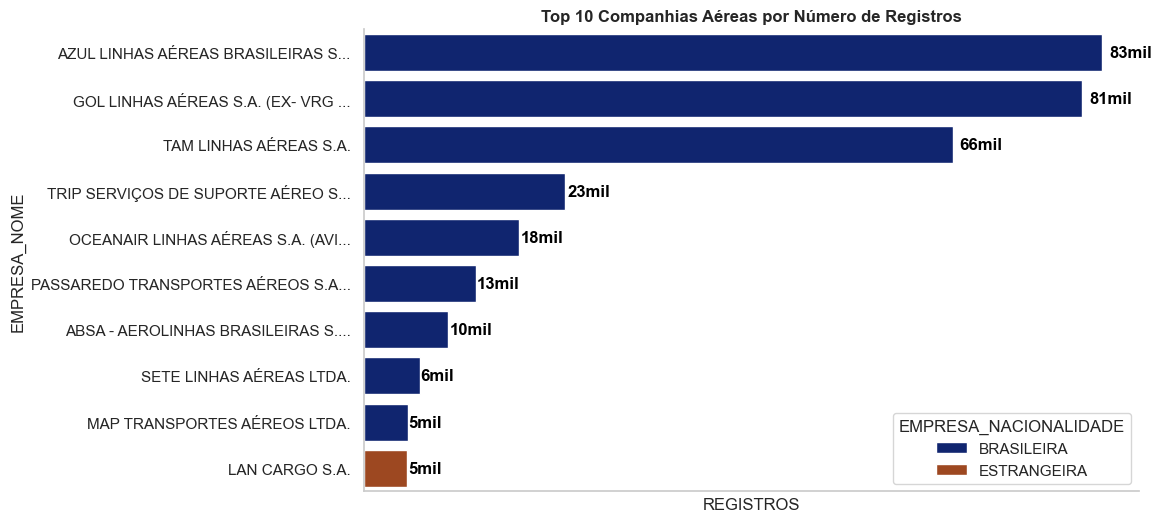

In [11]:
top10_registers = Basic_aggregate(table='voo',col_aggregate="*",cols_group=['EMPRESA_NOME','EMPRESA_NACIONALIDADE'],order='DESC',append='LIMIT 10').run_count()

df_top10_registers = pd.DataFrame(data=top10_registers,columns=['EMPRESA_NOME','EMPRESA_NACIONALIDADE','REGISTROS'])

df_top10_registers['EMPRESA_NOME'] = df_top10_registers['EMPRESA_NOME'].apply(lambda nome: truncate_label(nome))

values_top10_registers = fast_instance(data=df_top10_registers,
                            x='REGISTROS',
                            y='EMPRESA_NOME',
                            title='Top 10 Companhias Aéreas por Número de Registros')

values_top10_registers['grafico']['hue'] = 'EMPRESA_NACIONALIDADE'


top10_registers_chart = My_barplot(**values_top10_registers)
top10_registers_chart.make()

#### Quantidade de decolagens por empresa


O segundo gráfico de barras revela uma mudança nas métricas, com destaque para as decolagens. A Gol lidera com 2,780,495 decolagens, seguida pela Tam (2,533,461) e Azul (2,197,296). Notavelmente, 7 das 10 empresas no ranking são brasileiras. Essa inversão nas posições em relação às métricas anteriores destaca a relevância das operações de decolagem, evidenciando o impacto da Gol nesse aspecto específico da aviação.

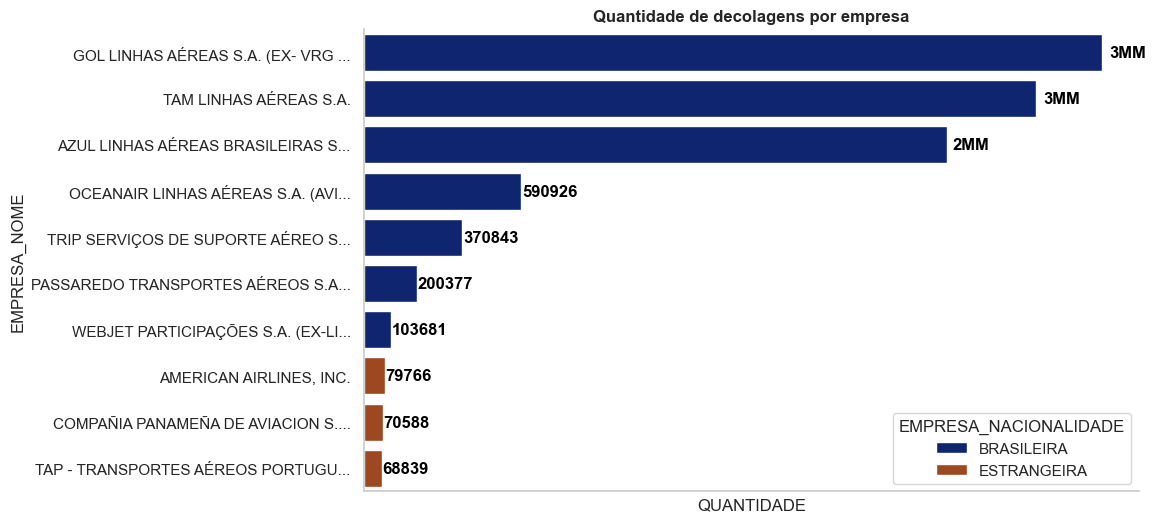

In [12]:
top10_decolagens = Basic_aggregate(table='voo',cols_group=['EMPRESA_NOME','EMPRESA_NACIONALIDADE'],col_aggregate='DECOLAGENS',order='DESC',append='LIMIT 10').run_sum()

df_top10_decolagens = pd.DataFrame(data=top10_decolagens,columns=['EMPRESA_NOME','EMPRESA_NACIONALIDADE','QUANTIDADE'])
df_top10_decolagens['EMPRESA_NOME'] = df_top10_decolagens['EMPRESA_NOME'].apply(lambda nome: truncate_label(nome))

values_top10_decolagens = fast_instance(data=df_top10_decolagens,
                                        x='QUANTIDADE',
                                        y='EMPRESA_NOME',
                                        title='Quantidade de decolagens por empresa')

values_top10_decolagens['grafico']['hue'] = 'EMPRESA_NACIONALIDADE'

top10_decolagens_chart = My_barplot(**values_top10_decolagens)
top10_decolagens_chart.make()

#### Registros por ano


O notável pico em registros de voos em 2011 (107,288,861) diminuiu progressivamente até atingir o mínimo em 2020 (49,972,780), atribuído principalmente aos impactos da pandemia de COVID-19. Restrições de viagem e queda na demanda levaram a uma significativa redução nas operações aéreas, destacando a influência direta da crise global no setor de aviação.

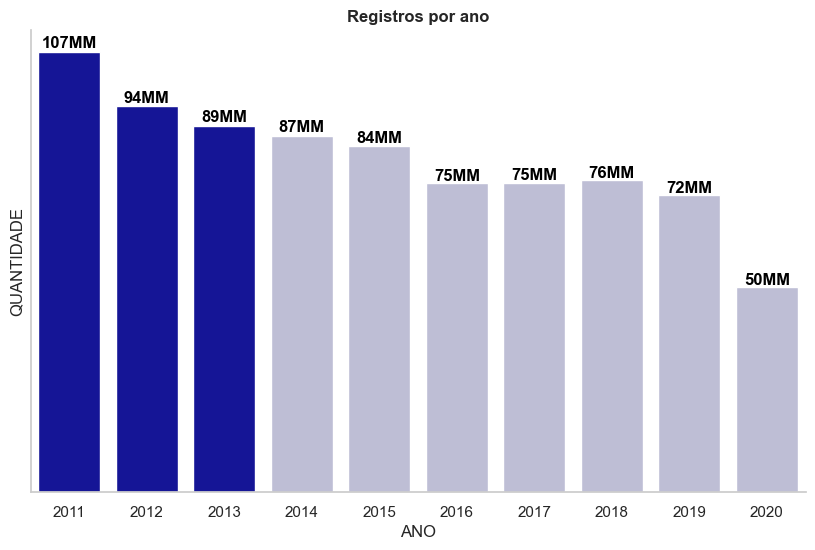

In [13]:
decolagens_ano = Basic_aggregate(table='voo',cols_group=['ANO'],col_aggregate='ANO').run_sum()
df_decolagens_ano = pd.DataFrame(data=decolagens_ano,columns=['ANO','QUANTIDADE'])

values_anos = fast_instance(data=df_decolagens_ano,
                                        x='ANO',
                                        y='QUANTIDADE',
                                        title='Registros por ano')

values_anos['grafico']['orient'] = 'v'

palette_list = ["#0000AB"] * 3 + ["#BABAD9"] * 7
values_anos['estilo'] = {'palette':palette_list}
values_anos['grafico']['palette'] = palette_list
values_anos['grafico']['hue'] = 'ANO'
values_anos['grafico']['legend'] = False


registros_anos_chart = My_barplot(**values_anos)
registros_anos_chart.make()

#### Registros por meses

 Embora não seja conclusivo quanto à sazonalidade, observa-se uma flutuação nos registros, com picos notáveis em janeiro (40,213), outubro (36,586) e dezembro (35,910). Essa oscilação pode indicar possíveis padrões sazonais, mas seria necessário análise adicional para confirmar tendências consistentes ao longo dos meses.

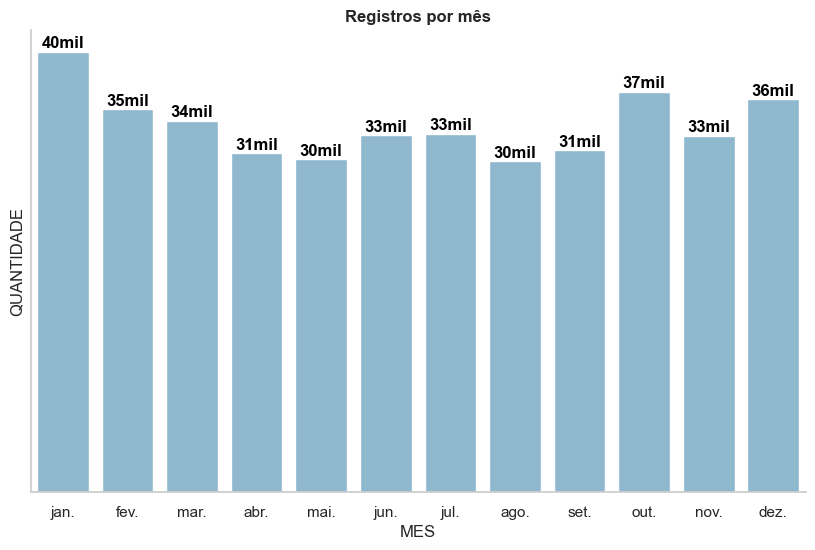

In [14]:
meses = ['jan.','fev.','mar.','abr.','mai.','jun.','jul.','ago.','set.','out.','nov.','dez.']

decolagens_mes = Basic_aggregate(table='voo',cols_group=['MES'],col_aggregate='MES').run_count()

df_decolagens_mes = pd.DataFrame(data=decolagens_mes,columns=['MES','QUANTIDADE'])
df_decolagens_mes['MES'] = df_decolagens_mes['MES'].map({i: mes for i, mes in enumerate(meses, start=1)})


values_mes = fast_instance(data=df_decolagens_mes,
                                        x='MES',
                                        y='QUANTIDADE',
                                        title='Registros por mês')


palette_list = ["#84BAD9"] * 12
values_mes['grafico']['orient'] = 'v'
values_mes['estilo'] = {'palette':palette_list}
values_mes['grafico']['palette'] = palette_list
values_mes['grafico']['hue'] = 'MES'
values_mes['grafico']['legend'] = False


registros_mes_chart = My_barplot(**values_mes)
registros_mes_chart.make()

#### Df_decolagens

In [15]:
decolagens = Basic_select('voo',['DECOLAGENS']).run()
df_decolagens = pd.DataFrame(data=decolagens, columns=['DECOLAGENS'])

#### Boxplot de decolagens

A identificação de 37,047 outliers em 402,631 registros de decolagens sugere uma notável assimetria nos dados, com uma alta concentração de outliers em valores mais altos. Inicialmente, não é possível tirar conclusões definitivas, sendo necessário um aprofundamento na análise desses valores para compreender as razões por trás dessa distribuição assimétrica e extrair insights mais precisos.

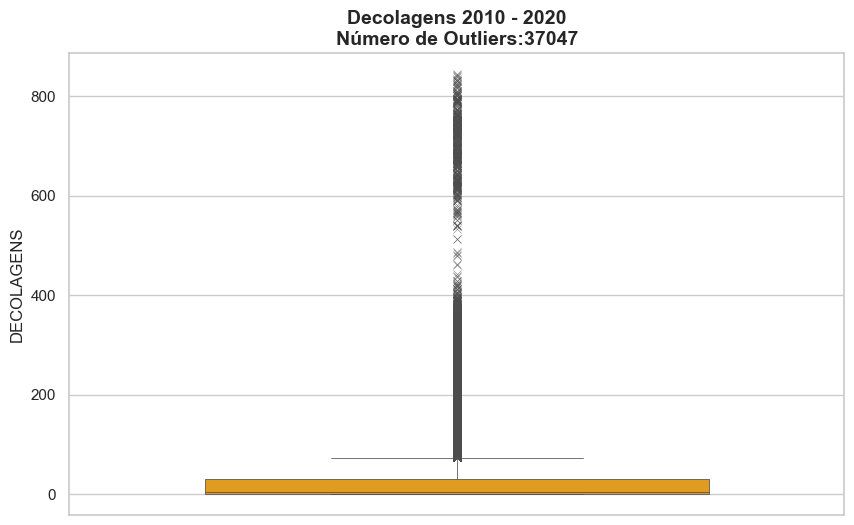

In [16]:
values_decolagens_y = fast_instance(df_decolagens,y='DECOLAGENS',title='Decolagens 2010 - 2020')
decolagens_tes_boxplot = My_boxplot(**values_decolagens_y)
decolagens_tes_boxplot.make()

#### Histograma de decolagens

O histograma de decolagens revela um formato de despenhadeiro, indicando uma concentração significativa de valores no bin inicial próximo a zero. Este padrão sugere que a maioria das observações está em valores baixos, com uma queda abrupta nos bins seguintes. Essa peculiaridade destaca a necessidade de uma análise mais aprofundada para compreender as razões subjacentes a essa distribuição específica.

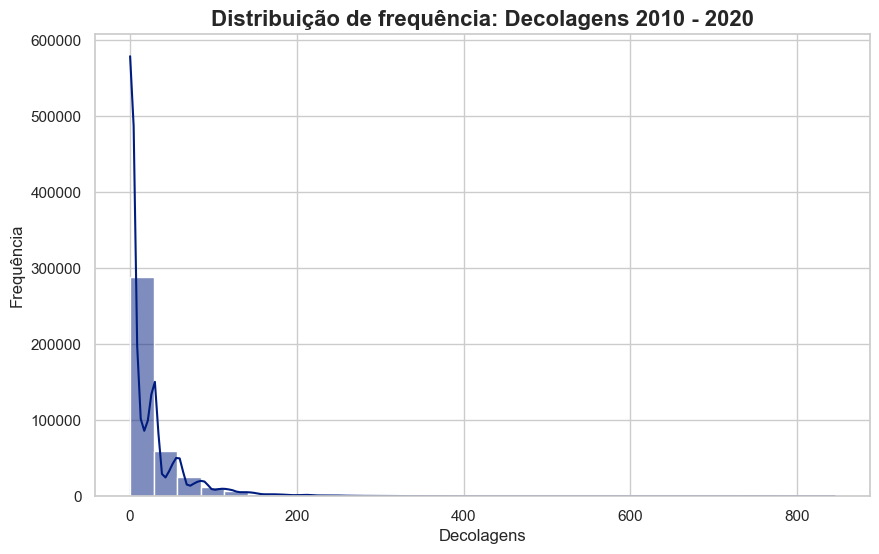

In [17]:
values_decolagens_x = fast_instance(df_decolagens,x='DECOLAGENS',title='Distribuição de frequência: Decolagens 2010 - 2020')
values_decolagens_x['grafico']['bins'] = 30
values_decolagens_x['eixos'] = {"xlabel":'Decolagens', "ylabel":'Frequência'}

hist_decolagens = My_histplot(**values_decolagens_x)

hist_decolagens.make()

#### Correlação das variáveis - Mapa de calor


- Ano e mês: Não apresentam correlações significativas com outras variáveis, indicando que não há uma relação direta com os indicadores do setor.

- Indicadores (ASK, RPK, ATK, RTK): Forte correlação no centro do gráfico, revelando uma interdependência entre esses indicadores-chave, essenciais para avaliar o desempenho do transporte aéreo.

- Número de Passageiros e Assentos: Alta correlação, sugerindo que o número de passageiros está diretamente relacionado à capacidade de assentos da aeronave.

- Combustível em Litros: Relações razoáveis com várias variáveis. Pode ser mais acentuado ao filtrar dados apenas para empresas nacionais, uma vez que esses dados estão disponíveis apenas para companhias brasileiras.

- Payload: Correlações fortes com outras variáveis, especialmente com o número de passageiros e assentos, destacando sua importância na capacidade de transporte da aeronave.

- Horas Voadas: Apresenta correlações razoáveis e fortes, destacando-se a forte relação com a distância percorrida, indicando a eficiência operacional em termos de tempo de voo.

In [18]:
con_correlation = Consume_bd()
query_quantitative = con_correlation.make_query("""
    SELECT column_name
    FROM information_schema.columns
    WHERE table_name = 'voo'
    AND data_type <> 'character varying';
    """)


cols_quantitative = [column_name[0] for column_name in query_quantitative]
del cols_quantitative[cols_quantitative.index('id')]

query_correlation = con_correlation.make_query(f'SELECT {", ".join(cols_quantitative)} FROM voo')

df_correlation = pd.DataFrame(data=query_correlation, columns=cols_quantitative)

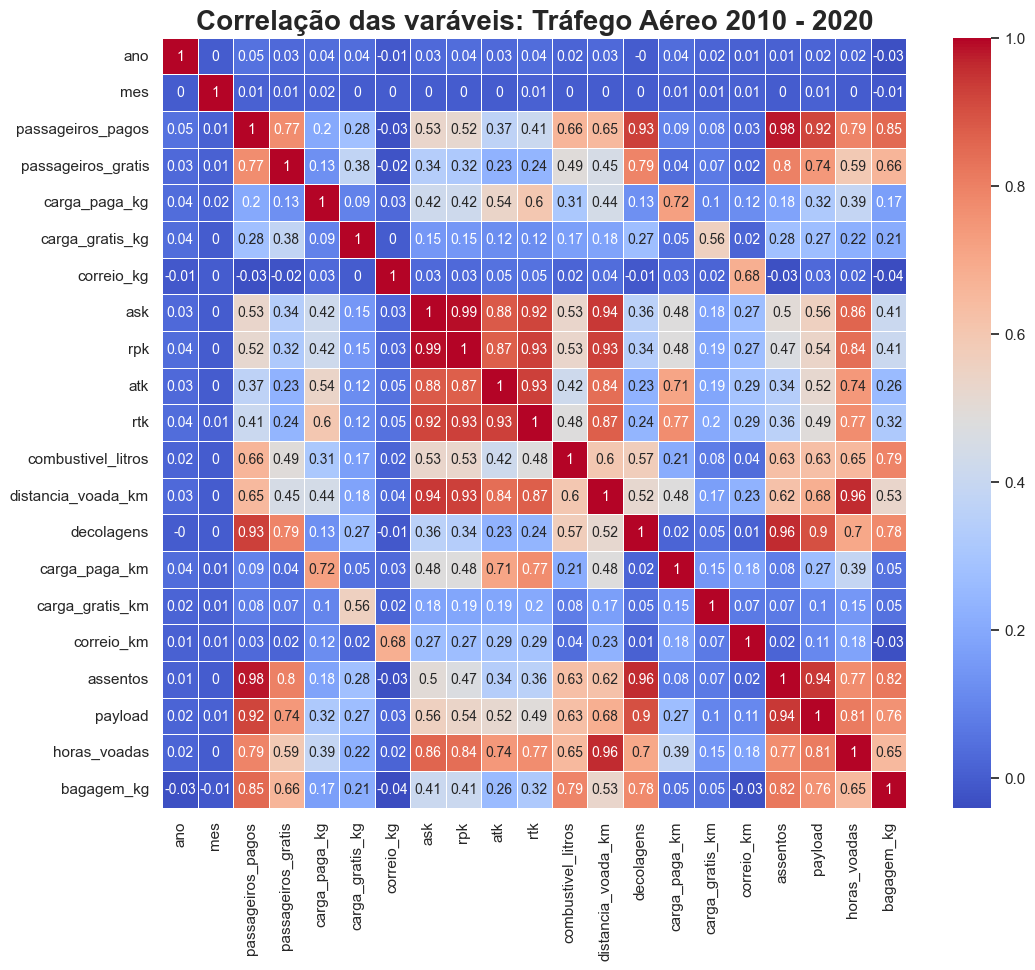

In [19]:
values_correlation= fast_instance(data=df_correlation,
                                  x=list(df_correlation.columns),
                                  y=list(df_correlation.columns),
                                  title='Correlação das varáveis: Tráfego Aéreo 2010 - 2020')

correlation_heatmap_chart = My_headmap(**values_correlation)
correlation_heatmap_chart.make()

#### Grupo de Histograma das variáveis

O formato de despenhadeiro nas variáveis indica uma distribuição assimétrica nos dados, com a maioria das observações concentradas em valores mais baixos e uma queda acentuada à medida que os valores aumentam. Esse padrão sugere uma distribuição desigual das instâncias, com características específicas nas variáveis analisadas. A presença desse despenhadeiro em cada variável ressalta a necessidade de uma investigação mais aprofundada para compreender os fatores que contribuem para essa distribuição peculiar.

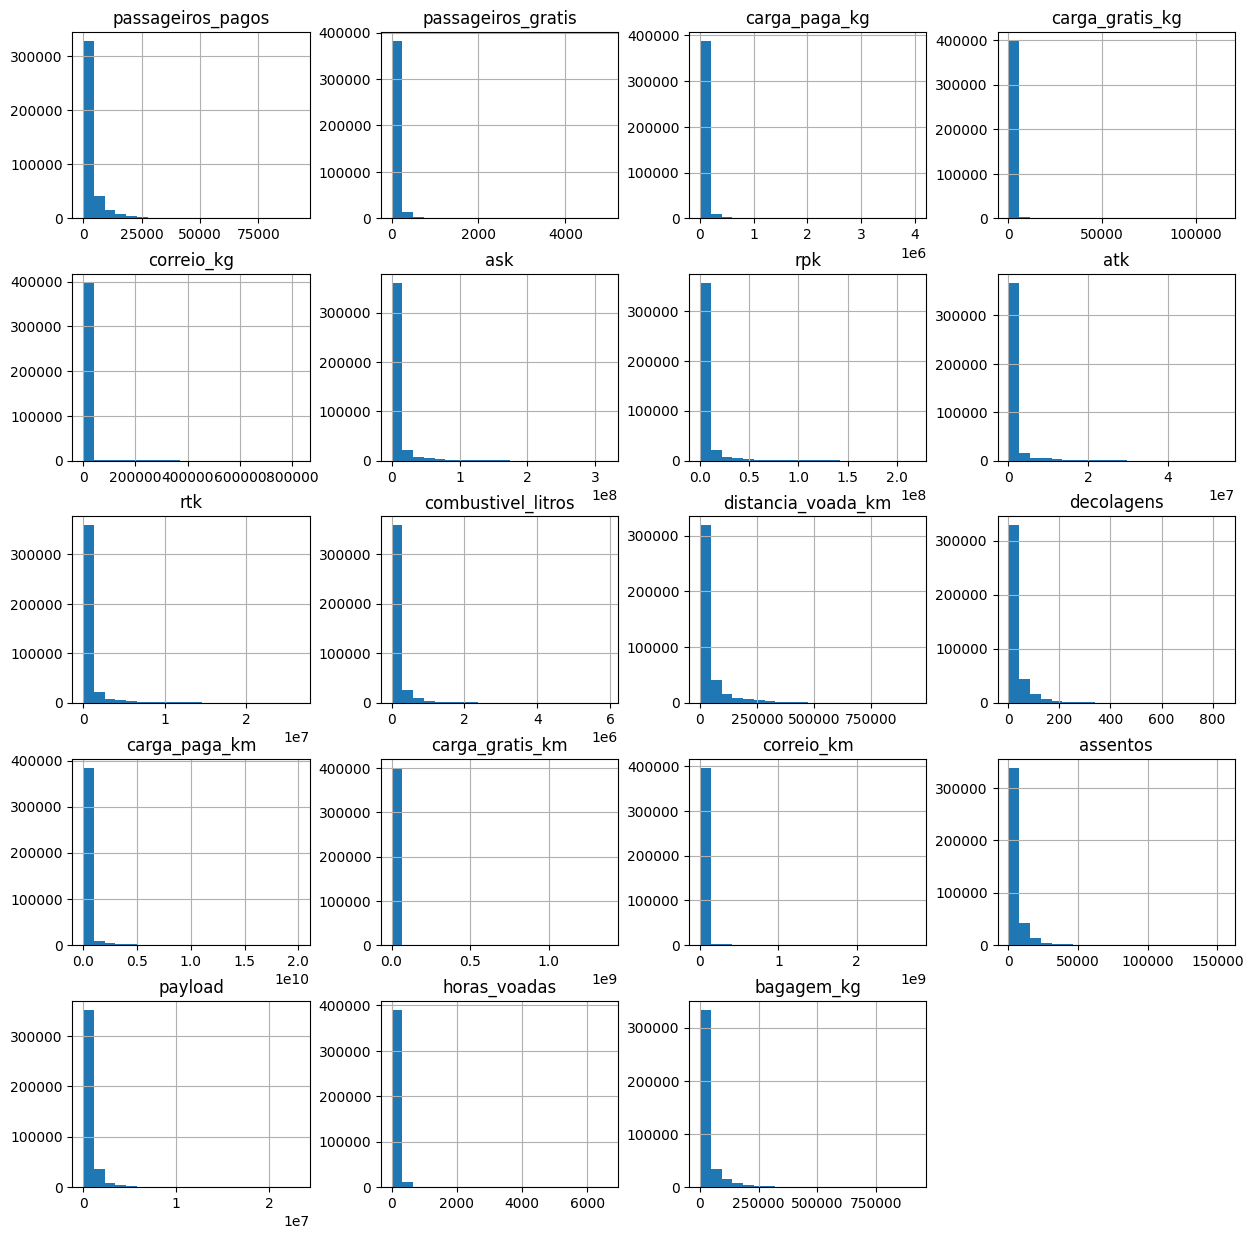

In [20]:
sns.reset_defaults()

%matplotlib inline

select = list(df_correlation.columns)
df_correlation[select[2:]].hist(bins=20, figsize=(15, 15))

plt.show()

#### Distância dos voos por decolagens

Ao analisar o gráfico observamos uma correlação positiva e moderada de 0.52. Isso sugere que, à medida que o número de decolagens aumenta, a distância voada também tende a aumentar. A diferenciação entre as classes de dados, estrangeira e brasileira, é notável e será detalhada mais a fundo no próximo gráfico

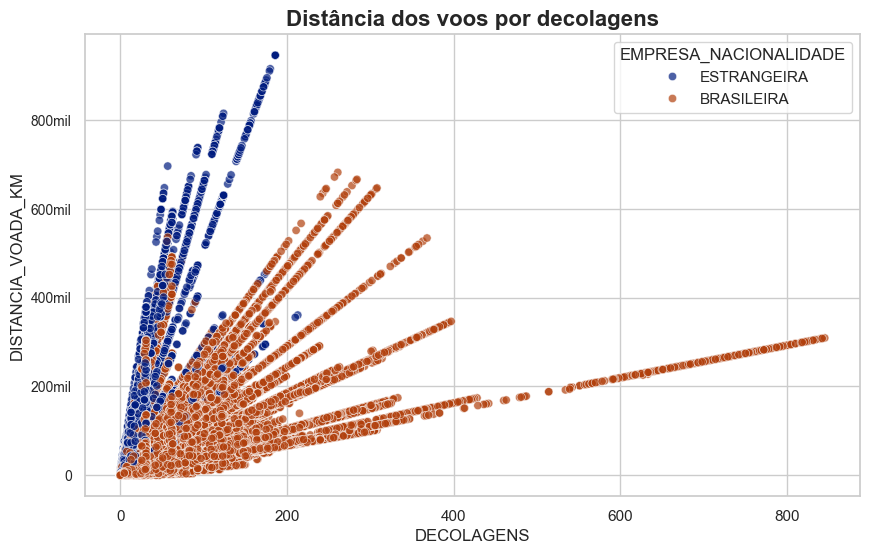

In [21]:
distancias_decolagens = Basic_select('voo',['DECOLAGENS','DISTANCIA_VOADA_KM','EMPRESA_NACIONALIDADE']).run()

df_distancias_decolagens= pd.DataFrame(data=distancias_decolagens,columns=['DECOLAGENS','DISTANCIA_VOADA_KM','EMPRESA_NACIONALIDADE'])

values_distancias_decolagens = fast_instance(data=df_distancias_decolagens,
                                             x='DECOLAGENS',
                                             y='DISTANCIA_VOADA_KM',
                                             title='Distância dos voos por decolagens')

values_distancias_decolagens['grafico']['hue'] = 'EMPRESA_NACIONALIDADE'

atk_rtk_chart = My_scatterplot(**values_distancias_decolagens)
atk_rtk_chart.make()

In [22]:
correlacao_decolagens = df_distancias_decolagens['DECOLAGENS'].corr(df_distancias_decolagens['DISTANCIA_VOADA_KM'])

print(f'Correlação entre as decolagens e distância voada em kms: {correlacao_decolagens:.2f}')


Correlação entre as decolagens e distância voada em kms: 0.52


#### Distância dos voos por decolagens - Classes: Estrangeira e Brasileira

Destaca-se a notável diferenciação no comportamento entre empresas internacionais e brasileiras. As empresas internacionais exibem uma correlação positiva forte de 0.82, indicando que, para elas, há uma relação mais significativa entre o aumento do número de decolagens e a distância voada. 

Por outro lado, as empresas brasileiras mostram uma correlação positiva moderada de 0.66. Essa diferença sugere que, para as empresas internacionais, é mais viável e parte de sua estratégia realizar voos com longas distâncias, enquanto as empresas brasileiras apresentam uma relação um pouco menos intensa entre essas variáveis.

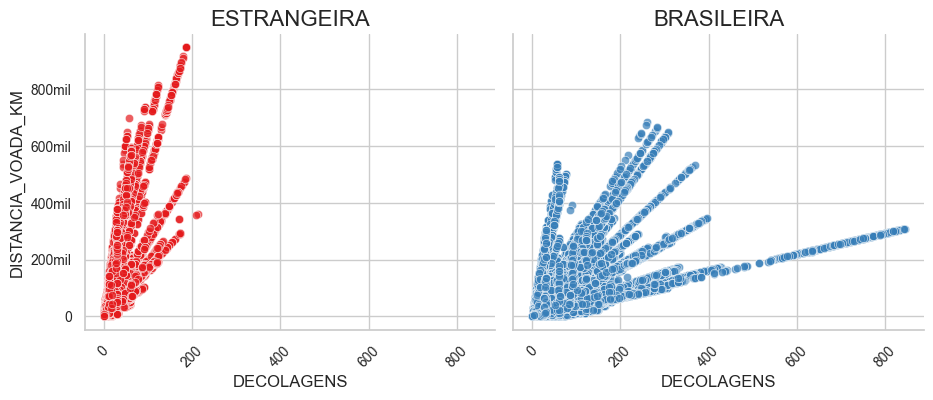

In [23]:
values_distancias_decolagens_group = copy.deepcopy(values_distancias_decolagens)
values_distancias_decolagens_group["grafico"]["col"] = "EMPRESA_NACIONALIDADE"

values_distancias_decolagens_group_chart = My_group_scatterplot(**values_distancias_decolagens_group)
values_distancias_decolagens_group_chart.make()

In [24]:
df_distancias_decolagens_inter = df_distancias_decolagens.loc[df_distancias_decolagens["EMPRESA_NACIONALIDADE"] == 'ESTRANGEIRA']
df_distancias_decolagens_nacio = df_distancias_decolagens.loc[df_distancias_decolagens["EMPRESA_NACIONALIDADE"] == 'BRASILEIRA']

correlacao_decolagens_inter = df_distancias_decolagens_inter['DECOLAGENS'].corr(df_distancias_decolagens_inter['DISTANCIA_VOADA_KM'])
correlacao_decolagens_nacio = df_distancias_decolagens_nacio['DECOLAGENS'].corr(df_distancias_decolagens_nacio['DISTANCIA_VOADA_KM'])

print(f'Correlação entre as decolagens e distância voada em kms das empresas Internacionais: {correlacao_decolagens_inter:.2f}')
print(f'Correlação entre as decolagens e distância voada em kms das empresas Nacionais: {correlacao_decolagens_nacio:.2f}')

Correlação entre as decolagens e distância voada em kms das empresas Internacionais: 0.81
Correlação entre as decolagens e distância voada em kms das empresas Nacionais: 0.66


#### Distâncias por horas voadas

Ao analisar o gráfico das variáveis de Distância Voada e Horas Voadas, destaca-se uma correlação positiva forte de 0.96 em todos os dados, indicando uma relação intensa e positiva entre essas duas variáveis. Notavelmente, essa correlação permanece consistente, com pouca variação, tanto para as empresas internacionais quanto para as brasileiras. Essa consistência sugere que, independentemente da origem da empresa, a distância voada está fortemente associada ao tempo total de voo, indicando um comportamento esperado pela base de dados.

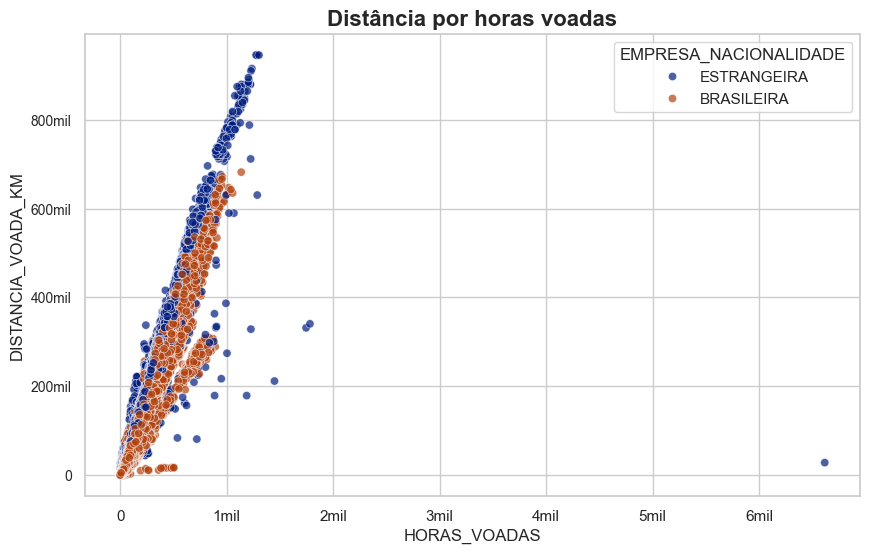

In [25]:
distancias_horas = Basic_select('voo',['HORAS_VOADAS','DISTANCIA_VOADA_KM','EMPRESA_NACIONALIDADE']).run()

df_distancias_horas= pd.DataFrame(data=distancias_horas,columns=['HORAS_VOADAS','DISTANCIA_VOADA_KM','EMPRESA_NACIONALIDADE'])

values_distancias_horas = fast_instance(data=df_distancias_horas,
                                        x='HORAS_VOADAS',
                                        y='DISTANCIA_VOADA_KM',
                                        title='Distância por horas voadas')
values_distancias_horas['grafico']['hue'] = 'EMPRESA_NACIONALIDADE'

distancias_horas_chart = My_scatterplot(**values_distancias_horas)
distancias_horas_chart.make()

In [26]:
correlacao_dist_horas = df_distancias_horas['DISTANCIA_VOADA_KM'].corr(df_distancias_horas['HORAS_VOADAS'])

print(f'Correlação entre as decolagens e distância voada em kms: {correlacao_dist_horas:.2f}')

Correlação entre as decolagens e distância voada em kms: 0.96


#### Distância por horas voadas - Classes: Estrangeira e Brasileira

Ao analisar as classes separadamente, a correlação entre Distância Voada e Horas Voadas aumentou para 0.98 nas empresas estrangeiras, mantendo-se estável nas brasileiras. Destaca-se a identificação de um outlier na classe internacional, tendo ele um elevado número de horas voadas, mas baixa distância, podendo ser uma possível falha de registro, sendo necessário uma investigação no registro.

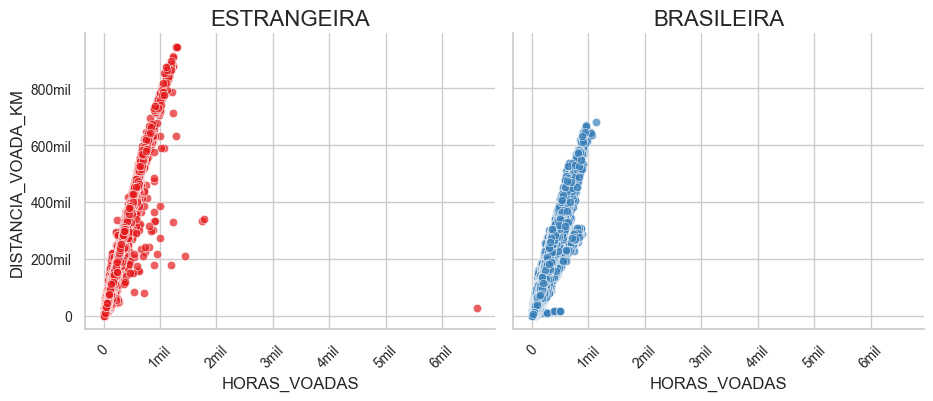

In [27]:
values_distancias_horas_group = copy.deepcopy(values_distancias_horas)
values_distancias_horas_group["grafico"]["col"] = "EMPRESA_NACIONALIDADE"

values_distancias_horas_group_chart = My_group_scatterplot(**values_distancias_horas_group)
values_distancias_horas_group_chart.make()

In [28]:
df_distancias_horas_inter = df_distancias_horas.loc[df_distancias_horas["EMPRESA_NACIONALIDADE"] == 'ESTRANGEIRA']
df_distancias_horas_nacio = df_distancias_horas.loc[df_distancias_horas["EMPRESA_NACIONALIDADE"] == 'BRASILEIRA']

correlacao_horas_voadas_inter = df_distancias_horas_inter['HORAS_VOADAS'].corr(df_distancias_horas_inter['DISTANCIA_VOADA_KM'])
correlacao_horas_voadas_nacio = df_distancias_horas_nacio['HORAS_VOADAS'].corr(df_distancias_horas_nacio['DISTANCIA_VOADA_KM'])

print(f'Correlação entre as horas_voadas e distância voada em kms das empresas Internacionais: {correlacao_horas_voadas_inter:.2f}')
print(f'Correlação entre as horas_voadas e distância voada em kms das empresas Nacionais: {correlacao_horas_voadas_nacio:.2f}')

Correlação entre as horas_voadas e distância voada em kms das empresas Internacionais: 0.98
Correlação entre as horas_voadas e distância voada em kms das empresas Nacionais: 0.96


#### ATK x RTK

As variáveis ATK (Available tonne kilometer) e RTK (Revenue tonne kilometer), evidencia-se uma correlação positiva forte de 0.93. A relação entre essas variáveis sugere que um aumento na capacidade disponível está positivamente associado a um aumento correspondente no volume efetivamente transportado. Essa forte correlação aponta para uma eficiência significativa e valor econômico, indicando que a capacidade oferecida está sendo utilizada de maneira efetiva na geração de receitas.

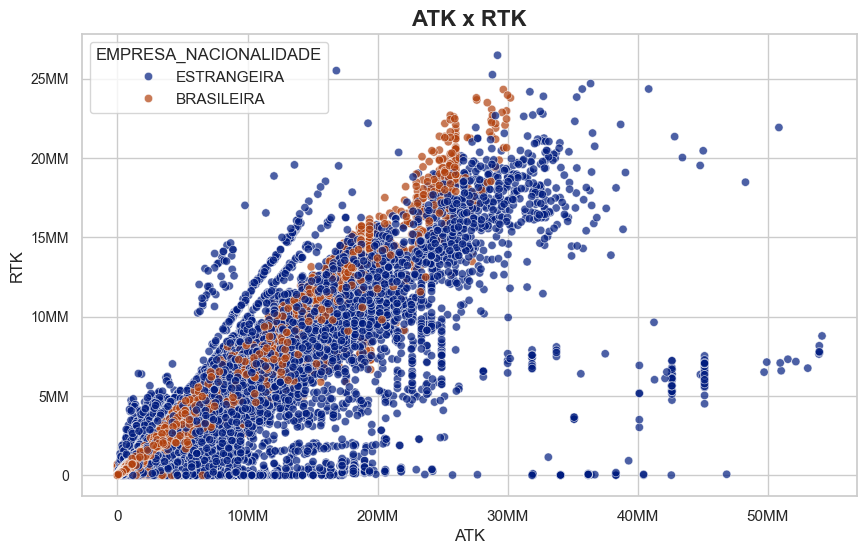

In [29]:
atk_rtk = Basic_select('voo',['ATK','RTK','EMPRESA_NACIONALIDADE']).run()

df_atk_rtk = pd.DataFrame(data=atk_rtk,columns=['ATK','RTK','EMPRESA_NACIONALIDADE'])

values_atk_rtk = fast_instance(data=df_atk_rtk,
                               x='ATK',
                               y='RTK',
                               title='ATK x RTK')
values_atk_rtk['grafico']['hue'] = 'EMPRESA_NACIONALIDADE'

atk_rtk_chart = My_scatterplot(**values_atk_rtk)
atk_rtk_chart.make()

In [30]:
correlacao_atk_rtk = df_atk_rtk['ATK'].corr(df_atk_rtk['RTK'])

print(f'Correlação entre as ATK e RTK: {correlacao_atk_rtk:.2f}')

Correlação entre as ATK e RTK: 0.93


#### ATK x RTK - Classes: Estrangeira e Brasileira

Ao analisar os dados por categoria, destaca-se uma correlação positiva forte em ambas, sendo de 0.93 para empresas internacionais e 0.98 para as brasileiras. Esses valores indicam um desempenho elevado no setor de aviação, ressaltando a eficiência tanto no contexto internacional quanto no cenário brasileiro

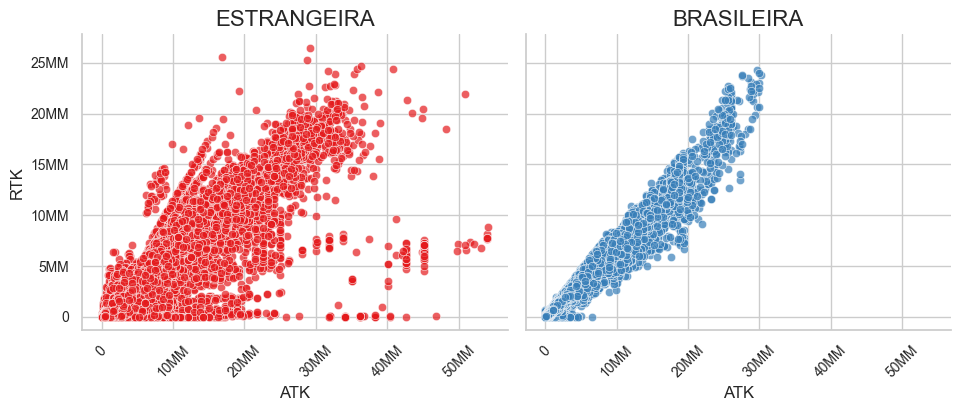

In [31]:
values_atk_rtk_group = copy.deepcopy(values_atk_rtk)
values_atk_rtk_group["grafico"]["col"] = "EMPRESA_NACIONALIDADE"

atk_rtk_group_chart = My_group_scatterplot(**values_atk_rtk_group)
atk_rtk_group_chart.make()

In [32]:
df_atk_rtk_inter = df_atk_rtk.loc[df_atk_rtk["EMPRESA_NACIONALIDADE"] == 'ESTRANGEIRA']
df_atk_rtk_nacio = df_atk_rtk.loc[df_atk_rtk["EMPRESA_NACIONALIDADE"] == 'BRASILEIRA']

correlacao_atk_rtk_inter = df_atk_rtk_inter['ATK'].corr(df_atk_rtk_inter['RTK'])
correlacao_atl_rtk_nacio = df_atk_rtk_nacio['ATK'].corr(df_atk_rtk_nacio['RTK'])

print(f'Correlação entreATK e RTK das empresas Internacionais: {correlacao_atk_rtk:.2f}')
print(f'Correlação entreATK e RTK das empresas Nacionais: {correlacao_atl_rtk_nacio:.2f}')

Correlação entreATK e RTK das empresas Internacionais: 0.93
Correlação entreATK e RTK das empresas Nacionais: 0.98
